In [2]:
import sys
import os
import matplotlib.pyplot as plt 
import numpy as np 
import rt1plotpy

sys.path.insert(0,os.pardir)

%load_ext autoreload
%autoreload 2   

sys.path.insert(0,os.pardir) # パス検索の優先度を親ディレクトリにする．
import rt1raytrace
from  debug_init  import * 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


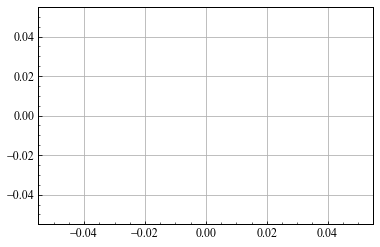

In [3]:
plt.plot([0])

DXF version: AC1021
num of lines:  11
num of circs:  0
num of arcs :  9
DXF version: AC1021
num of lines:  173
num of circs:  0
num of arcs :  45


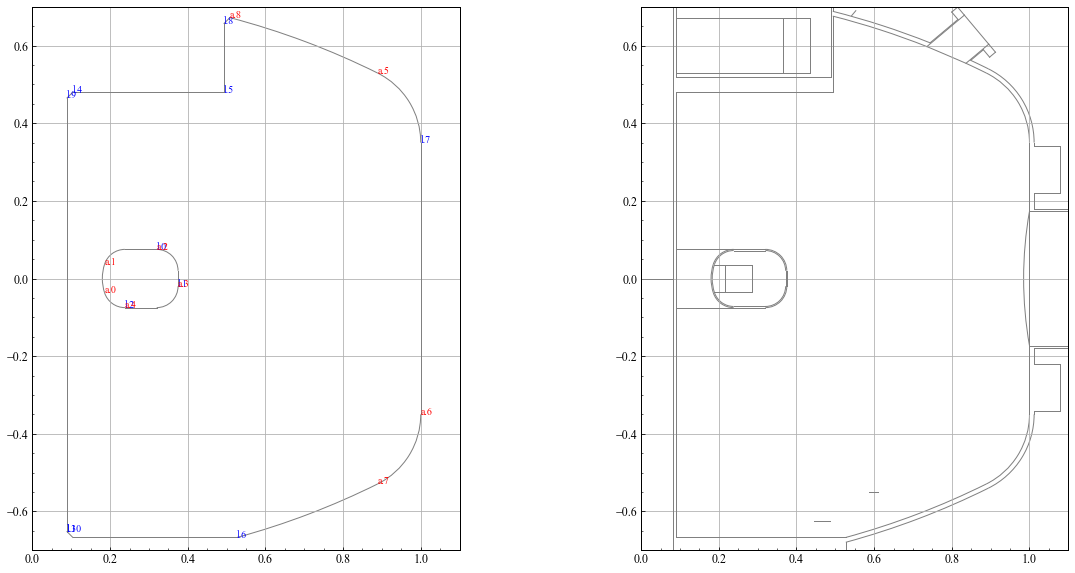

In [5]:
RT1_frame = rt1plotpy.Frame(dxf_file='..\\dxf_files\\simplest0.dxf')
RT1_frame_detail = rt1plotpy.Frame(dxf_file='..\\dxf_files\\main.dxf')

fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].set(**rt1_ax_kwargs)
ax[1].set(**rt1_ax_kwargs)
RT1_frame.append_frame(ax[0],label=True)
RT1_frame_detail.append_frame(ax[1])

In [7]:
focal_length =10.e-3 #[m]
h_length, w_length = 8.2e-3, 8.2e-3 #[m]
h_num   , w_num    = 200   , 200
h_ang0  , w_ang0    = -0.     , 28 #[deg]'..\\dxf_files\\simplest0.dxf'
Z0,R0 =  0.0 , 1.2

RT1_ray = rt1raytrace.Raytrace(dxf_file='..\\dxf_files\\simplest0.dxf')
RT1_ray.set_camera( focal_length =  focal_length        ,
                    image_size    = (h_length, w_length),
                    image_shape   = (h_num   , w_num)   ,
                    location      = (Z0      , R0)      ,
                    center_angles = (h_ang0  , w_ang0)  ,
                    rotation      = 0.00)
                 
N = 4
Lnum = [51,100,100,100]
RT1_ray.main2(N=N,Lmax=3, Lnum=Lnum)

you have to "set_camera()" or "set_angles()" next.

### start 1st raytrace ###


calculating Arcs : 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]


-0.21093 0.05416970130758601


calculating Arcs : 100%|██████████| 9/9 [00:07<00:00,  1.22it/s]


0.029390200000000033 0.015344179502871634


calculating Arcs : 100%|██████████| 9/9 [00:07<00:00,  1.22it/s]


0.0005878040000000251 0.0003458820638484638

### start 2nd raytrace ###


calculating Arcs : 100%|██████████| 9/9 [00:17<00:00,  1.98s/it]


-0.6522979797979799 0.36800428967529


calculating Arcs : 100%|██████████| 9/9 [00:20<00:00,  2.28s/it]


0.014993470054076363 0.008749312090790171


calculating Arcs : 100%|██████████| 9/9 [00:15<00:00,  1.77s/it]


0.00015144919246545818 8.855199037679761e-05

### start 3rd raytrace ###


calculating Arcs : 100%|██████████| 9/9 [00:15<00:00,  1.75s/it]


-0.2887828282828283 0.4473866455828369


calculating Arcs : 100%|██████████| 9/9 [00:15<00:00,  1.67s/it]


0.014993470054076363 0.008725238788881188


calculating Arcs : 100%|██████████| 9/9 [00:14<00:00,  1.66s/it]


!WARNING!, there are rays without intersection.
0.00015144919246545818 8.837303927382203e-05

### start 4th raytrace ###


calculating Arcs : 100%|██████████| 9/9 [00:17<00:00,  1.94s/it]


!WARNING!, there are rays without intersection.
-0.01614646464646465 0.4303468060574916


calculating Arcs : 100%|██████████| 9/9 [00:14<00:00,  1.56s/it]


!WARNING!, there are rays without intersection.
0.014993470054076363 0.008725313816637876


calculating Arcs : 100%|██████████| 9/9 [00:14<00:00,  1.61s/it]


!WARNING!, there are rays without intersection.
0.00015144919246545818 8.828872283146265e-05


In [7]:
RT1_ray.rays[3].correct_no_intersection()

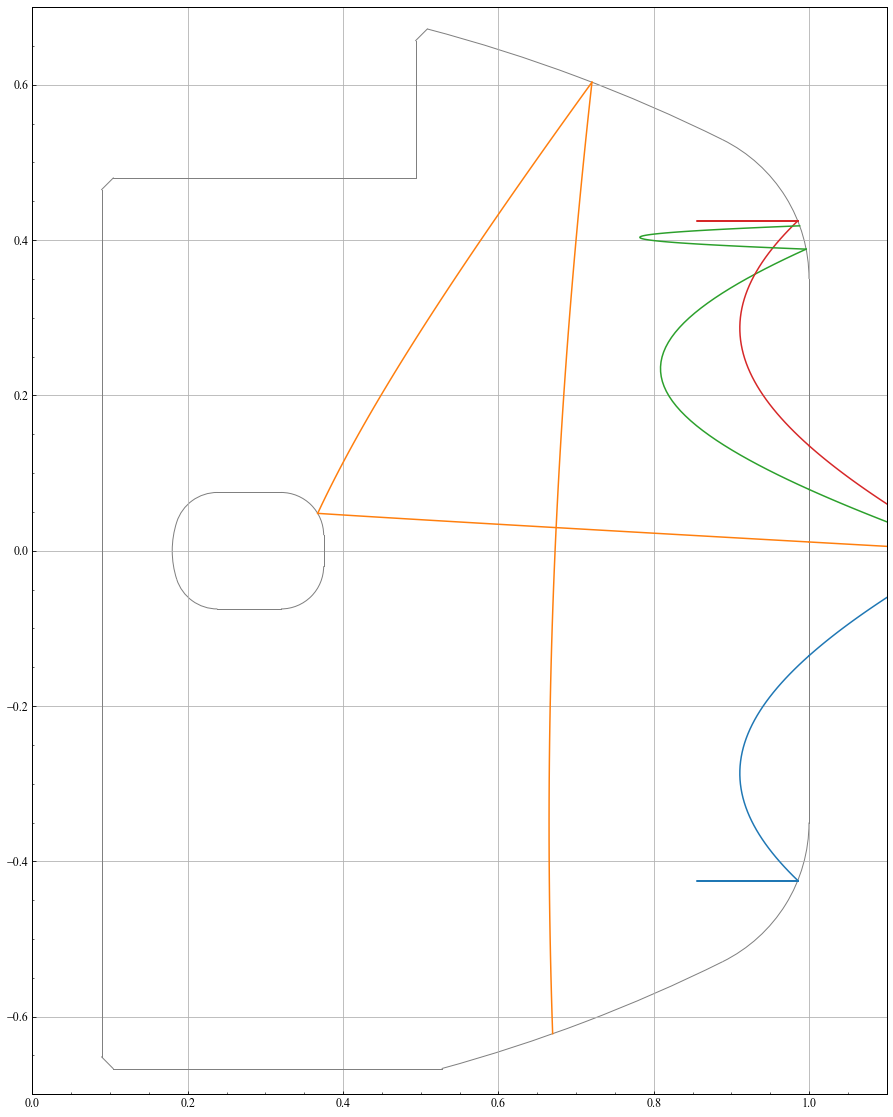

In [8]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,20))

hoge = RT1_ray.rays[3].ref_type==-1

RT1_ray.append_frame(ax)
ax.set(**rt1_ax_kwargs)
for n in range(N):
    R,Z=RT1_ray.rays[n].RZ_ray(Lnum=50)
    R = R[:,hoge]
    Z = Z[:,hoge]
    for i in range(R.shape[1]):
        ax.plot(R[:,i],Z[:,i],color=cycle(int(i%10)))

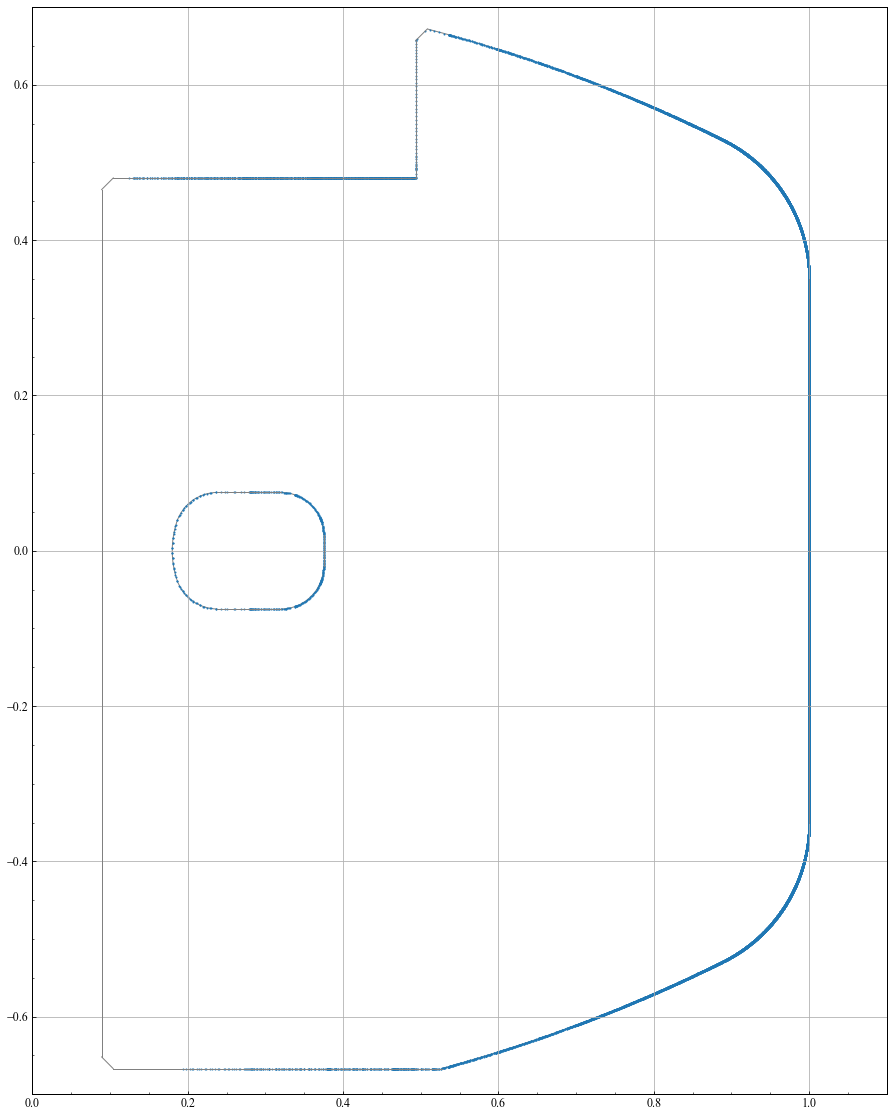

In [9]:
ray = RT1_ray.rays[2]
fig,ax = plt.subplots(figsize=(20,20))
rt1_ax_kwargs = {'xlim'  :(0,1.1),
                'ylim'  :(-0.7,0.7), 
                'aspect': 'equal'
                }
RT1_ray.append_frame(ax)
ax.set(**rt1_ax_kwargs)
R_1st,Z_1st = ray.RZ_ray(Lmax=ray.Length)

ax.scatter(R_1st.flatten(),Z_1st.flatten(),s=1,)
plt.show()

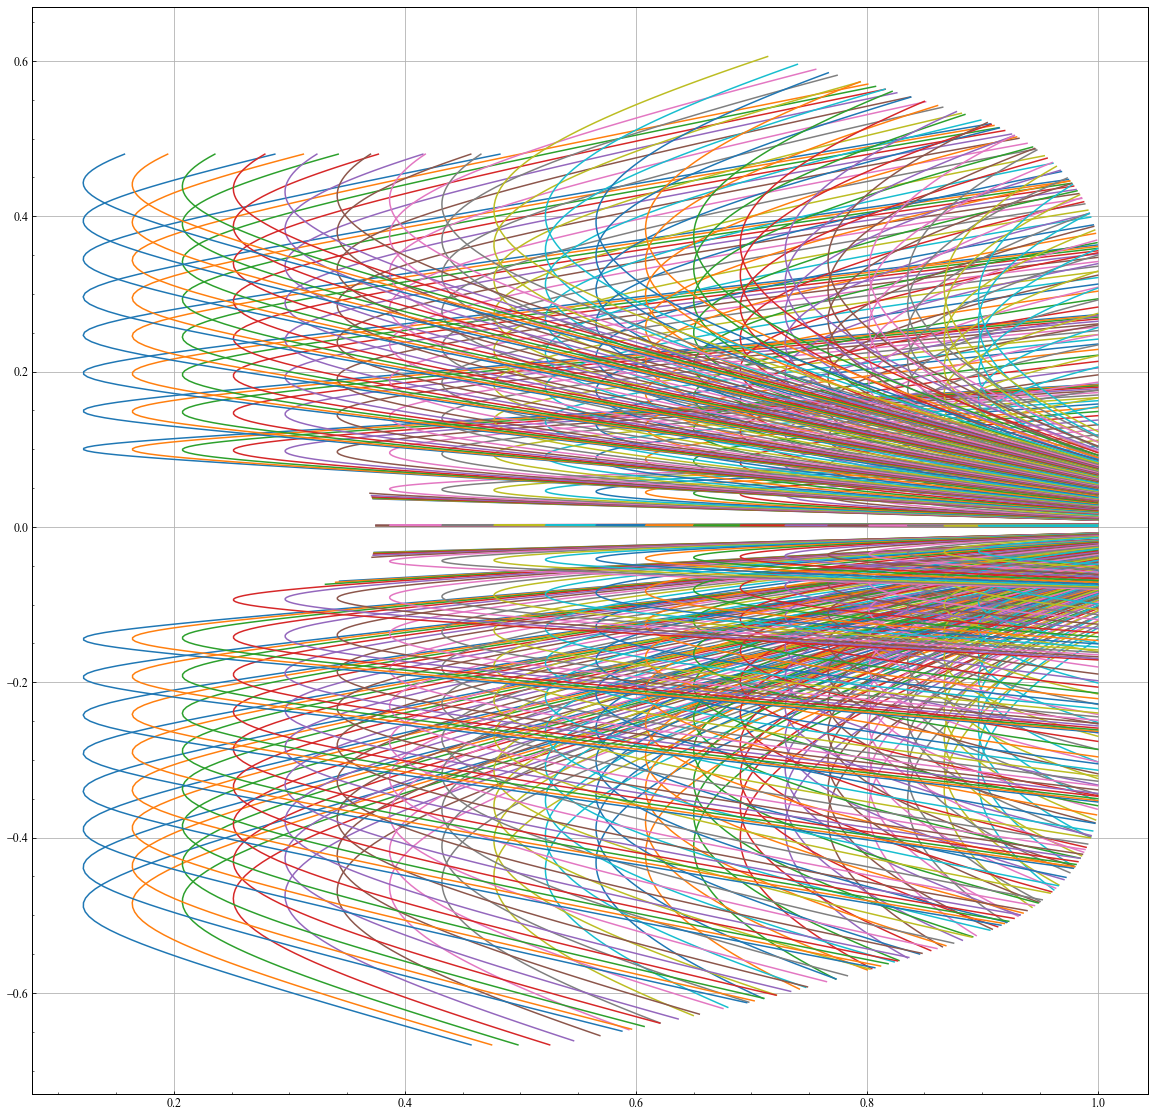

In [12]:
R,Z = RT1_ray.rays[1].RZ_ray(100)

plt.figure(figsize=(20,20))
for i in range(0,200,10):
    for j in range(0,200,10):
        plt.plot(R[:,i,j],Z[:,i,j])

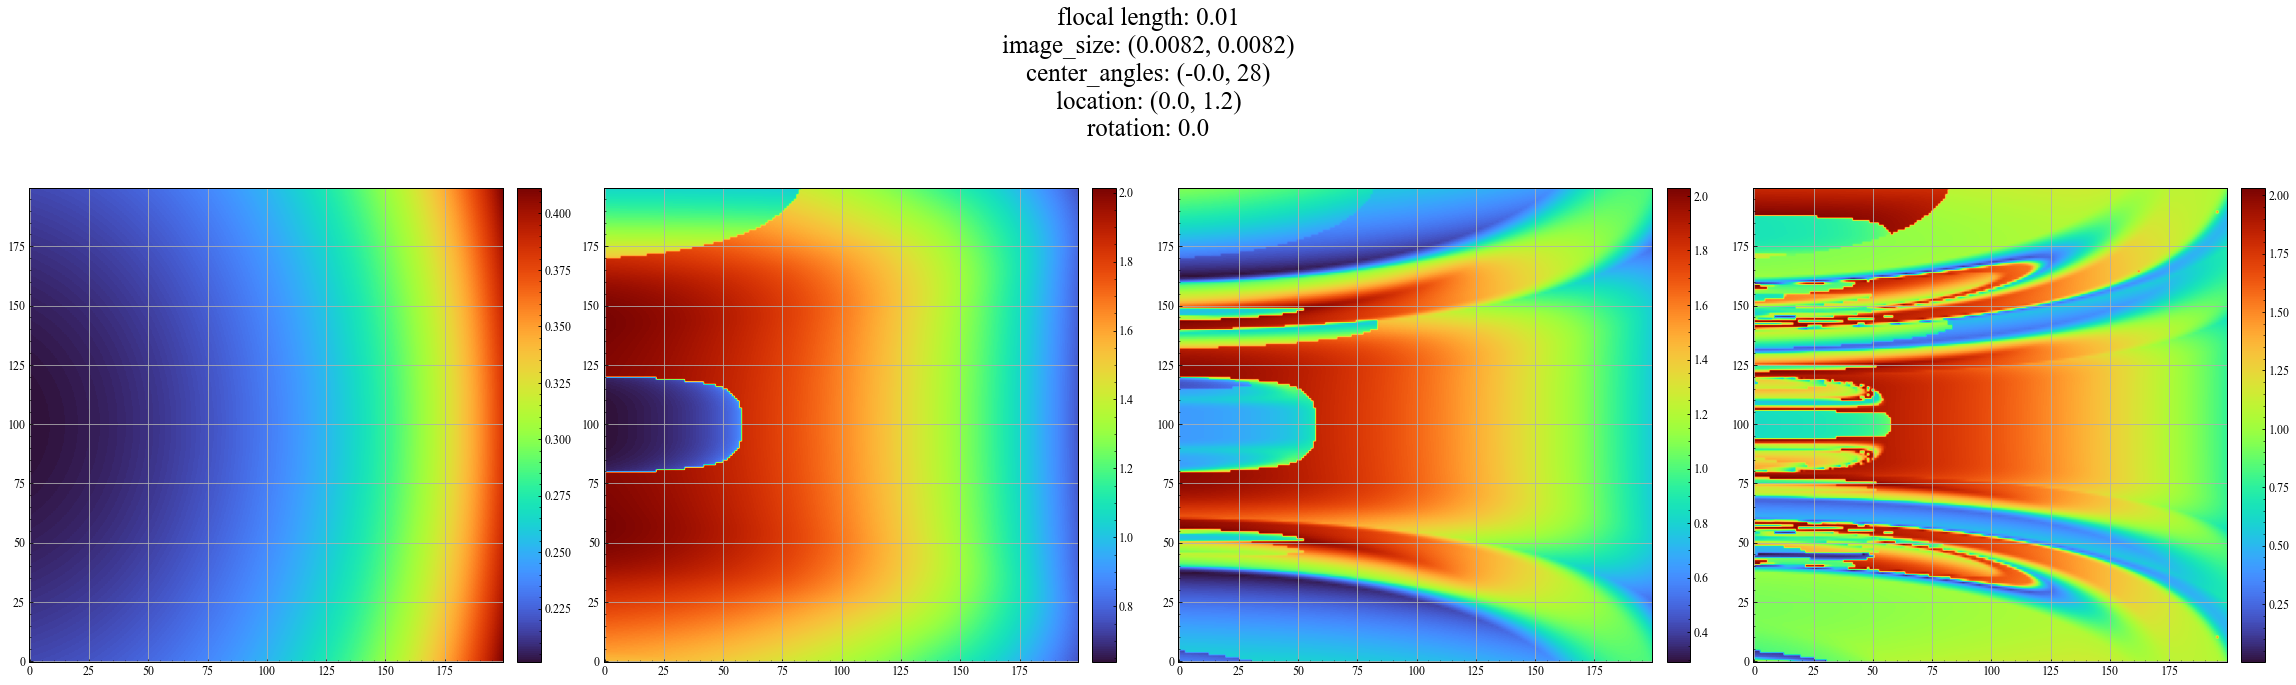

In [15]:
RT1_ray.save_model(path='model\\',name='test-20220714')